# Introduction to regression with Neural Networks in Tensorflow

# Regression Problems - Predicting a number (statistical analysis)
Estimating relationship between dependant variable and one or more independant variable

Example: How much or How many
* How much will my house sell for
* How many people will buy this app
* How much should I save each week for fuel

Inputs and outputs of regression:
Example: Predicting sale price of house

Inputs / Input features (Numerical encoding):
* Number of bedrooms, bathrooms etc. (Indipendant variable)
* Sale price of other house nearby

Outputs:
* Sale Price


In [ ]:
# Import Tensroflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

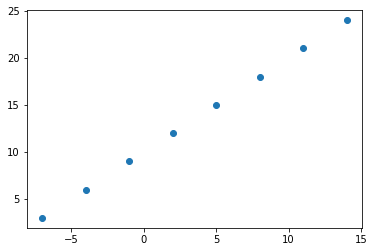

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels 
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualise it
plt.scatter(X,y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tennsor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim,y[0].ndim

(0, 0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float 32
X =tf.cast(tf.constant(X),dtype=tf.float32)
y =tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

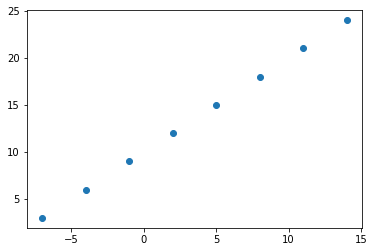

In [ ]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model

2. compile a model - define the loss function (aka the function which tells our model how wrong it is) and the optimiser (aka tells our model how to improve the patterns its learning ) and evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1) # Hidden layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 518ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred+11

array([[23.71602]], dtype=float32)

## Improving our model

We can imporve our model by altering the steps we took to create a model.

1. **creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of eeach layer

2. **Compiling a model** - here we might change the optimisation function or perhaps the **learning rate** of the optimisation function

3. **fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Lets rebuild our model

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1) # Hidden layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [ ]:
# Lets rebuild our model 2

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1) # Hidden layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 830ms/step - loss: 12.9513 - mae: 12.9513
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3835 - mae: 12.3835
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8019 - mae: 11.8019
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1297 - mae: 11.1297
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3797 - mae: 10.3797
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4756 - mae: 9.4756
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3110 - mae: 8.3110
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7787 - mae: 6.7787
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 4.6980 - mae: 4.6980
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 4.4936 - mae: 4.4936
Epoch 11/100
1/1 [==============================] - 0s 13ms/st

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[33.687202]], dtype=float32)

In [ ]:
# Lets rebuild our model 3

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1) # Hidden layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 748ms/step - loss: 13.2296 - mae: 13.2296
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1890 - mae: 13.1890
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1483 - mae: 13.1483
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1076 - mae: 13.1076
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0670 - mae: 13.0670
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0263 - mae: 13.0263
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9856 - mae: 12.9856
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 12.9448 - mae: 12.9448
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9039 - mae: 12.9039
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8634 - mae: 12.8634
Epoch 11/100
1/1 [==============================] - 0s 10ms/

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[11.170087]], dtype=float32)

## Common ways to imporve a deep model:
* Adding layers
* Increase the number of hidden units
* change the activation functions
* change the optimisation function
* change the learning rate (Most important hyper pattern on learning models)
* Fitting on more data
* Fitting for longer (epochs)

## Evaluating a models performance

In practice a typical workflow you will go through when building neural networks is

``` 
build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...


When it comes to evaluation... there are 3 words to memorise:
visualise,visualise,visulaise

Its a good idea to visulaise:
* the data - what data are we working with? what does it look like
* the model itself  - what oes our model look like 
* the training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up against the ground truth (the original labels...)

In [ ]:
# Make a bigger data set
X = tf.range(-100,100,4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the data sert
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

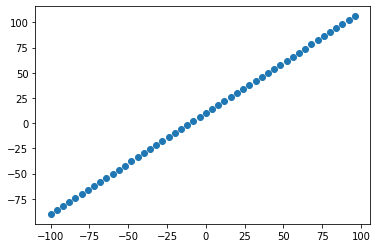

In [ ]:
# visualise the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets

**Training set** - the model learns from this data , which is typically 70-80% of the total data you have available

**validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

**Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

We want **Generalisation**: the ability for a ML model to perform well on data it hasnt seen before

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40] # First 40 are training samples (80% of the data)

X_test = X[40:] # Last 10 are training samples (20% of the data)
y_test = y[40:] # Last 10 are training samples (20% of the data)

len(X_train), len(X_test)


(40, 10)

### Visualising the data

Now we got our data in training and tests sets lets visualise it again

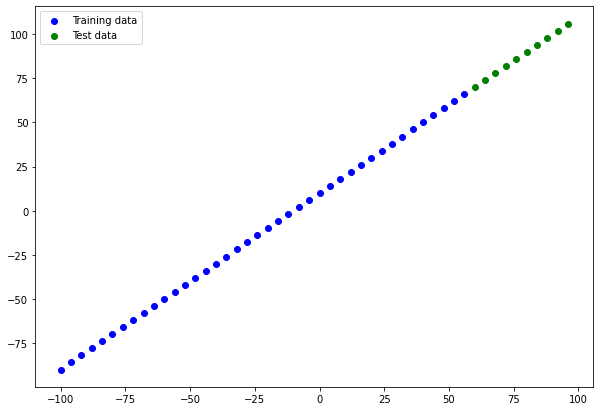

In [ ]:
plt.figure(figsize=(10,7))

# plot training data in blue

plt.scatter(X_train,y_train,c="b", label="Training data") # Our model will learn on this

# plot test data in green

plt.scatter(X_test,y_test,c="g", label="Test data") # want our model to be able to predict this (given X whats y?)

# show a legend
plt.legend();


In [ ]:
# Lets have look at how to build a neural network for our data

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1) # Hidden layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 26.9568 - mae: 26.9568
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 9.2571 - mae: 9.2571
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 7.8091 - mae: 7.8091
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7897 - mae: 8.7897
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 10.7443 - mae: 10.7443
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9378 - mae: 9.9378
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9948 - mae: 8.9948
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 9.0815 - mae: 9.0815
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 19.8113 - mae: 19.8113
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7048 - mae: 10.7048
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

In [ ]:
X[0], y[0
        ]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # Hidden layer
                             tf.keras.layers.Dense(1,name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total numbers of paramters in the model
* Trainable params - are the paramaters (patterns) the model can update as it trains
* Non trainable params - these paramters arent update during training (typical when you bring in already learned patterns or paramters from other models during **transfer learning**) 

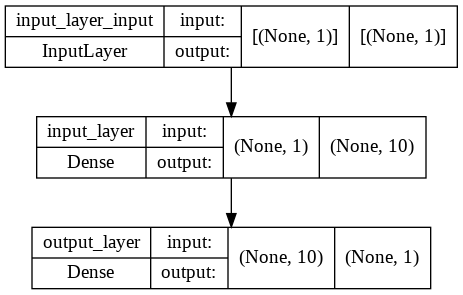

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

### Visualising our models predictions
 
To visualise predictions, its good itea to plot them against the ground truth labels

often you will see this in the form of `y_Test` or `y_true` versus `y_pred` (ground truth vs your models predictions)


In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** if you feel like you are going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [ ]:
# Lets create our plotting function

def plot_predictions(train_data = X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  # plots training data, test data and compares predictions to ground truth labels
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  # plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="predictions")
  plt.legend();

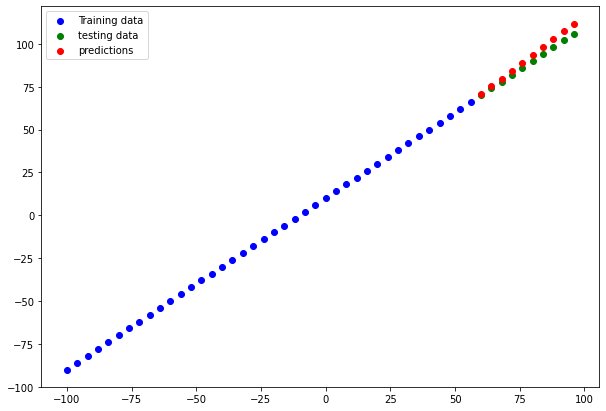

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### evaluating our models predictions with regression evaluation metrics

Depending on the problem you are working on , there will be different evaluation metrics to evaluate your models performance

since we are working on a regression problem, two of the main metrics:
* MAE - mean absolute error - On average how wrong is each of my models predictions
* MSE - Mean square error - Square the average errors

In [ ]:
# evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 303ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Calculate the mean absolute error    - Not right because shape of y test and y pred arent same
mae = tf.metrics.mean_absolute_error(y_true = y_test,y_pred=tf.constant(y_pred))

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# make some functions to reuse MAE and MSE

def MAE(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,y_pred=tf.squeeze(y_pred))

def MSE(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,y_pred=tf.squeeze(y_pred))

### Reducing experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it....
```

1. Get more data - get more examples for your model to train on (more oppertunites to learn patterns or relationships between features and labels)
2. make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give the model more of a chance to find patterns in the data.

Lets do 3 Modelling experiments:
1. `model_1` - same as original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**build model_1**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

# 2. compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

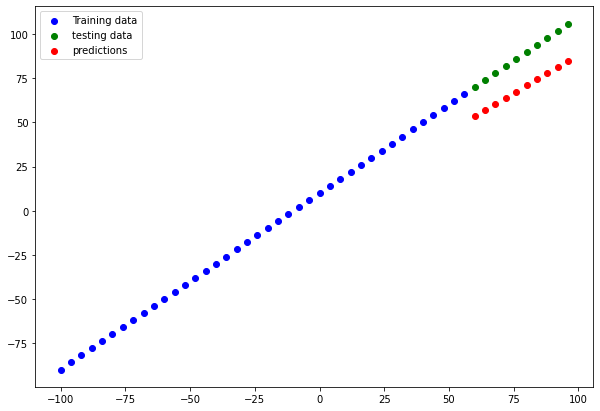

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = MAE(y_test,y_preds_1)
mse_1 = MSE(y_test,y_preds_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model 2**

* 2 dense layers, trained for 100 epochs

In [ ]:
# ALWAYS SET THE RANDOM SEED
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)


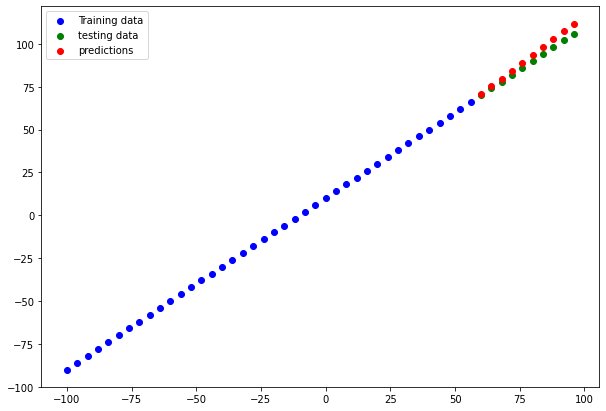

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = MAE(y_test,y_preds_2)
mse_2 = MSE(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model 3**

* 2 dense layers, trained for 500 epochs


In [ ]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

ValueError: ignored

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

ValueError: ignored

In [ ]:
mae_3 = MAE(y_test,y_preds_3)
mse_3 = MSE(y_test,y_preds_3)

mae_3,mse_3

NameError: ignored

**Note** You want to start with small experiments (small models) and make sure they work and increase their scale when necessary.

## compare the results of our experiments

We have run a few experiments now, lets compare the results

In [ ]:
# Lets compare our models results using pandas Dataframe
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]
                 ]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results


NameError: ignored

Looks like `model 2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Note: one of your main goals should be to minimize time between your experiments. The more experiments you do, the more things you will figure out which dont work and in turn, you will get closer to figuring out what doest work.  Remember the machine learning practionors motto "Experiment,experiment,experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiemnts.

And when doing so it can be tedious if you are running lots of experiments.

Luckily there are tools to help!

resource: as you build more models you will want to look into using
* TensorBoard - component of tensorflow library to help track modelling experiments
* Weights & Biases - A tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard)


## Saving our models 

Saving our models allows us to use them outside of google colab (or wherever they were trained) or a mobile app

there are 2 main formats we can save our models to

1. the SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("savedmodel_format")

INFO:tensorflow:Assets written to: savedmodel_format/assets


In [ ]:
# save model using HDF5 Format
model_2.save("savedmodel_HDF5_format.h5")


In [ ]:
# loading in a saved model format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/savedmodel_format")
loaded_SavedModel_format.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with saved model format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds 

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# load in a model using the .h5 format

loaded_h5_format = tf.keras.models.load_model("/content/savedmodel_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# A larger Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One hot encode our datafram so its all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (Features and Labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

## Creating the Model

In [ ]:
# Building the neural network

# Set the random speed
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)


In [ ]:
# check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

ValueError: ignored

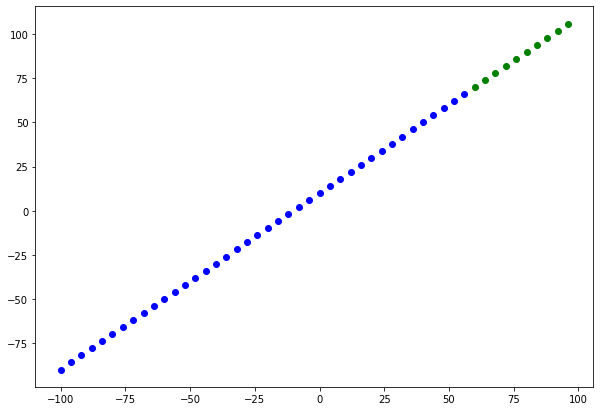

In [ ]:
insurance_model_pred = insurance_model.predict(X_test)
plot_predictions(predictions=insurance_model_pred)

## improvinging our model

To try improve our model, we will run 2 experiments
1. add an extra layer with more hidden units and use the Adam optimizer
2. same as above but train for longer (200 epochs)

In [ ]:
# Building the neural network model 2

# Set the random speed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"]
              )
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# check the results of insurance model on the test data
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
# Building the neural network model 2

# Set the random speed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"]
              )
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# check the results of insurance model on the test data
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
insurance_model.evaluate(X_test,y_test)

In [ ]:
# Plot history (also known as a loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# How long should you train for?

It depeends on the problem you are working on. tensorflow has a solution its called `tensorflow early stopping callback`: a tensorflow component you can add to your model to stop training once it stops improving a certain metrics



## Preprocessing Data (Normalization and standardisation)

In terms of scaling values, neural networks tend to perfer normalisation

If you are not sure which to use, try both and see which performs better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
X


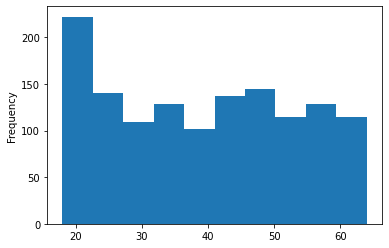

In [ ]:
X["age"].plot(kind="hist")

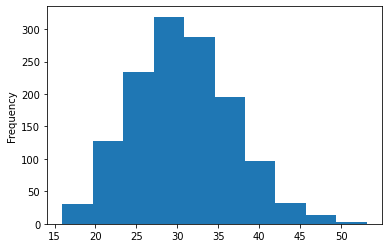

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Feature Scaling

2 types of feature scaling

* Standardisation (Scale) [Used as Default scalar with neural networks]= Converts all values to between 0 and 1 whilst preserving the original distribution - scikit-learn function: MinMaxScaler 
* Normalisation = Removes the mean and divides each value by the standard deviation - scikit-learn function: StandardScalar

To prepare our data, we can borrow a few classes from sickit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)
# Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalised and One hot encoded, now lets build a neural network on it

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1),
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model_4.fit(X_train_normal,y_train,epochs=100,verbose=0)

 Insurance model 2 results

 
9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
[4924.34765625, 4924.34765625]

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]